In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotnine as p9
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 1 6 region

In [39]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr_rbe.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

In [40]:
expr_scale = preprocessing.scale(expr.T, axis=0)
pca_obj = PCA(n_components=3, svd_solver="full")
components = pca_obj.fit_transform(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    pca_dat = pd.DataFrame(components[:, :2], columns=['PC1', 'PC2'])
    pca_dat["Labels"] = expr.columns
    pca_dat["Group"] = info.loc[pca_dat["Labels"], i].values
    pca_dat["Type"] = i
    tmp.append(pca_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = pca_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
pca_dat = pd.concat(tmp)
pca_dat["Type"] = pd.Categorical(pca_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

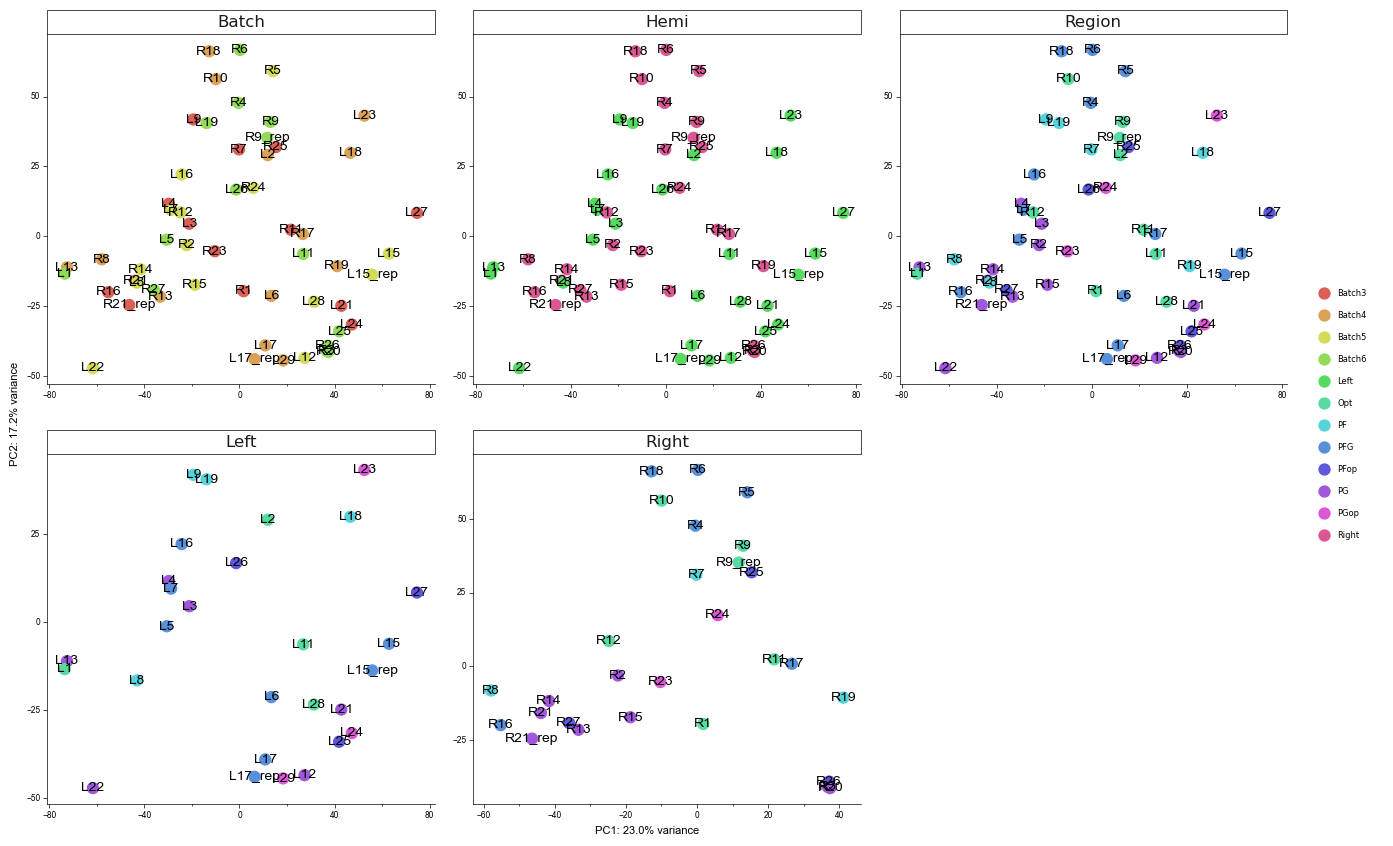

<ggplot: (8748371069404)>

In [41]:
pca_plot = ( p9.ggplot(p9.aes(x="PC1", y="PC2", color="Group"), pca_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="PC1", y="PC2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"PC1: {pca_obj.explained_variance_ratio_[0]:.1%} variance")
    + p9.ylab(f"PC2: {pca_obj.explained_variance_ratio_[1]:.1%} variance")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(pca_plot, "../res/1.qc/PCA_6region.pdf", units="in", width=25, height=16, verbose=False)
pca_plot

In [42]:
## 2.3 tSNE
tsne_obj = TSNE(n_components=2, perplexity=30, init="pca", learning_rate="auto", method='exact',
                metric='correlation', n_iter=10000, early_exaggeration=50)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = tsne_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
tsne_dat = pd.concat(tmp)
tsne_dat["Type"] = pd.Categorical(tsne_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


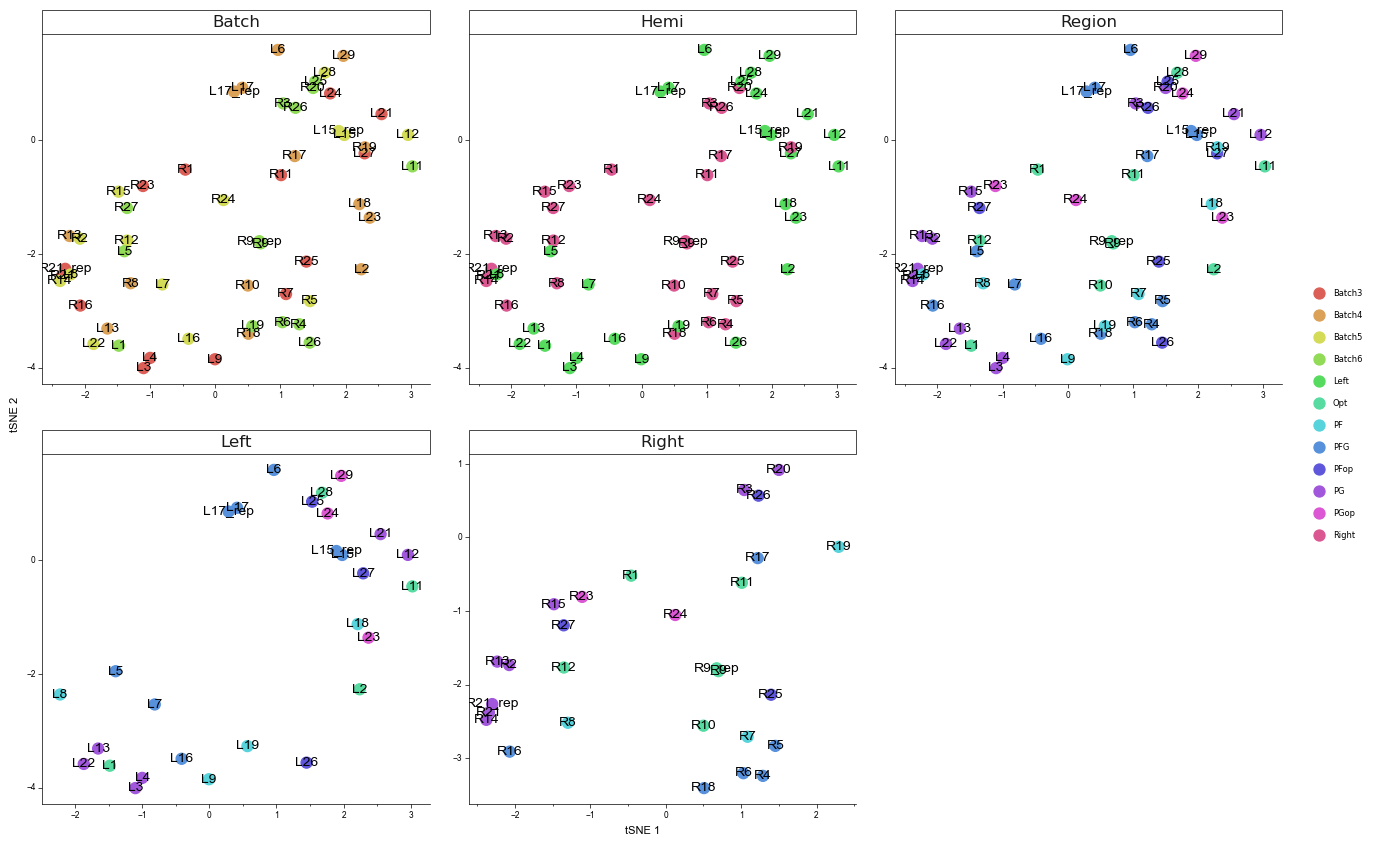

<ggplot: (8748345231312)>

In [43]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="tSNE1", y="tSNE2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_6region.pdf", units="in", width=25, height=16, verbose=False)
tsne_plot

In [44]:
umap_obj = umap.UMAP(n_neighbors=20, n_jobs=4, metric="correlation", learning_rate=0.1,
                     init="random", local_connectivity=5)
umap_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    umap_dat = pd.DataFrame(umap_obj.embedding_, columns=['UMAP1', 'UMAP2'])
    umap_dat["Labels"] = expr.columns
    umap_dat["Group"] = info.loc[umap_dat["Labels"], i].values
    umap_dat["Type"] = i
    tmp.append(umap_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = umap_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
umap_dat = pd.concat(tmp)
umap_dat["Type"] = pd.Categorical(umap_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

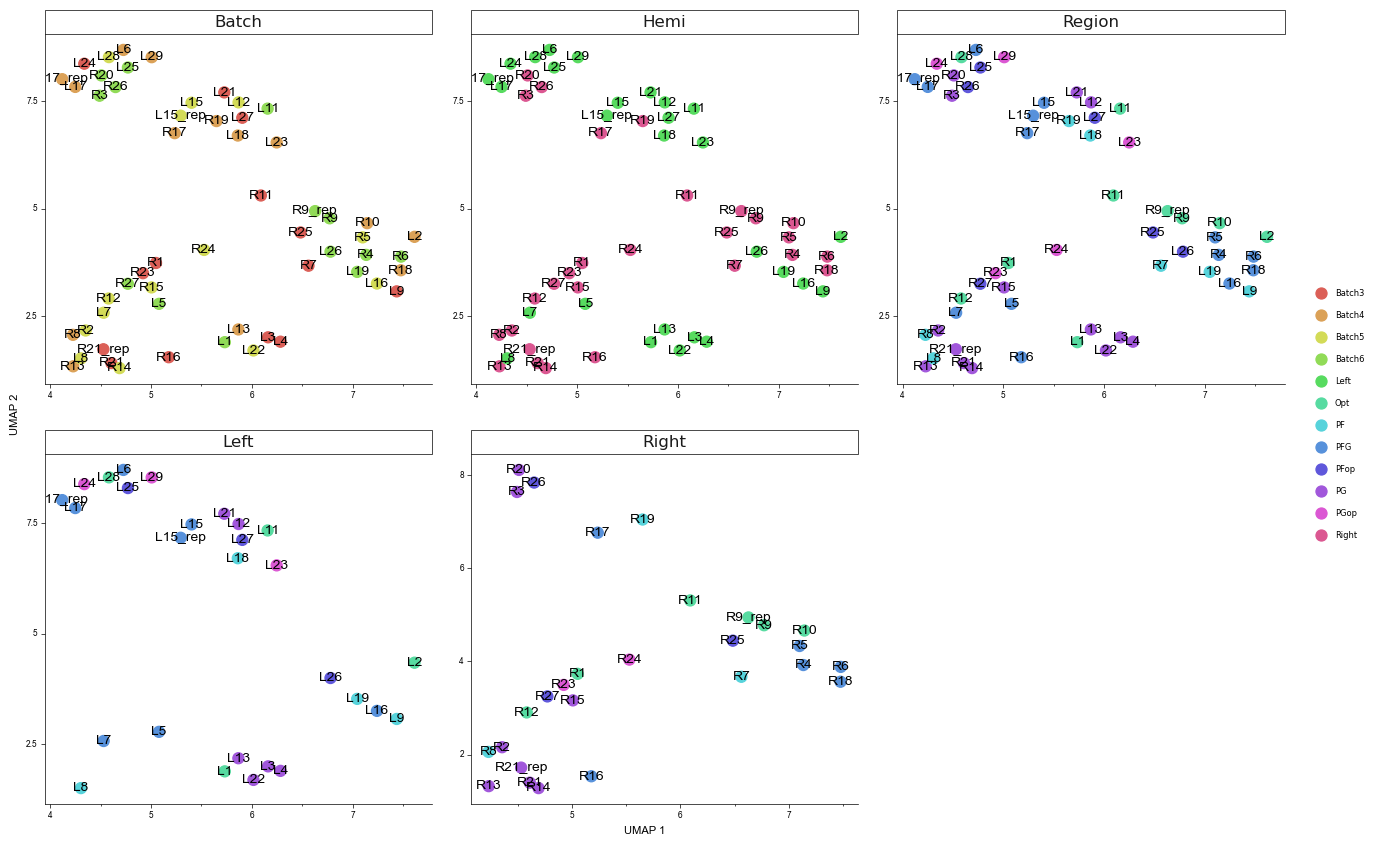

<ggplot: (8748298016383)>

In [45]:
umap_plot = ( p9.ggplot(p9.aes(x="UMAP1", y="UMAP2", color="Group"), umap_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="UMAP1", y="UMAP2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"UMAP 1")
    + p9.ylab(f"UMAP 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/UMAP_6region.pdf", units="in", width=25, height=16, verbose=False)
umap_plot

# 2 4 region

In [46]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

select_idx = info["Region"].isin(["PF", "PFG", "PG", "Opt"])
expr = expr.loc[:, select_idx]
info = info.loc[select_idx, :]

In [47]:
expr_scale = preprocessing.scale(expr.T, axis=0)
pca_obj = PCA(n_components=3, svd_solver="full")
components = pca_obj.fit_transform(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    pca_dat = pd.DataFrame(components[:, :2], columns=['PC1', 'PC2'])
    pca_dat["Labels"] = expr.columns
    pca_dat["Group"] = info.loc[pca_dat["Labels"], i].values
    pca_dat["Type"] = i
    tmp.append(pca_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = pca_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
pca_dat = pd.concat(tmp)
pca_dat["Type"] = pd.Categorical(pca_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

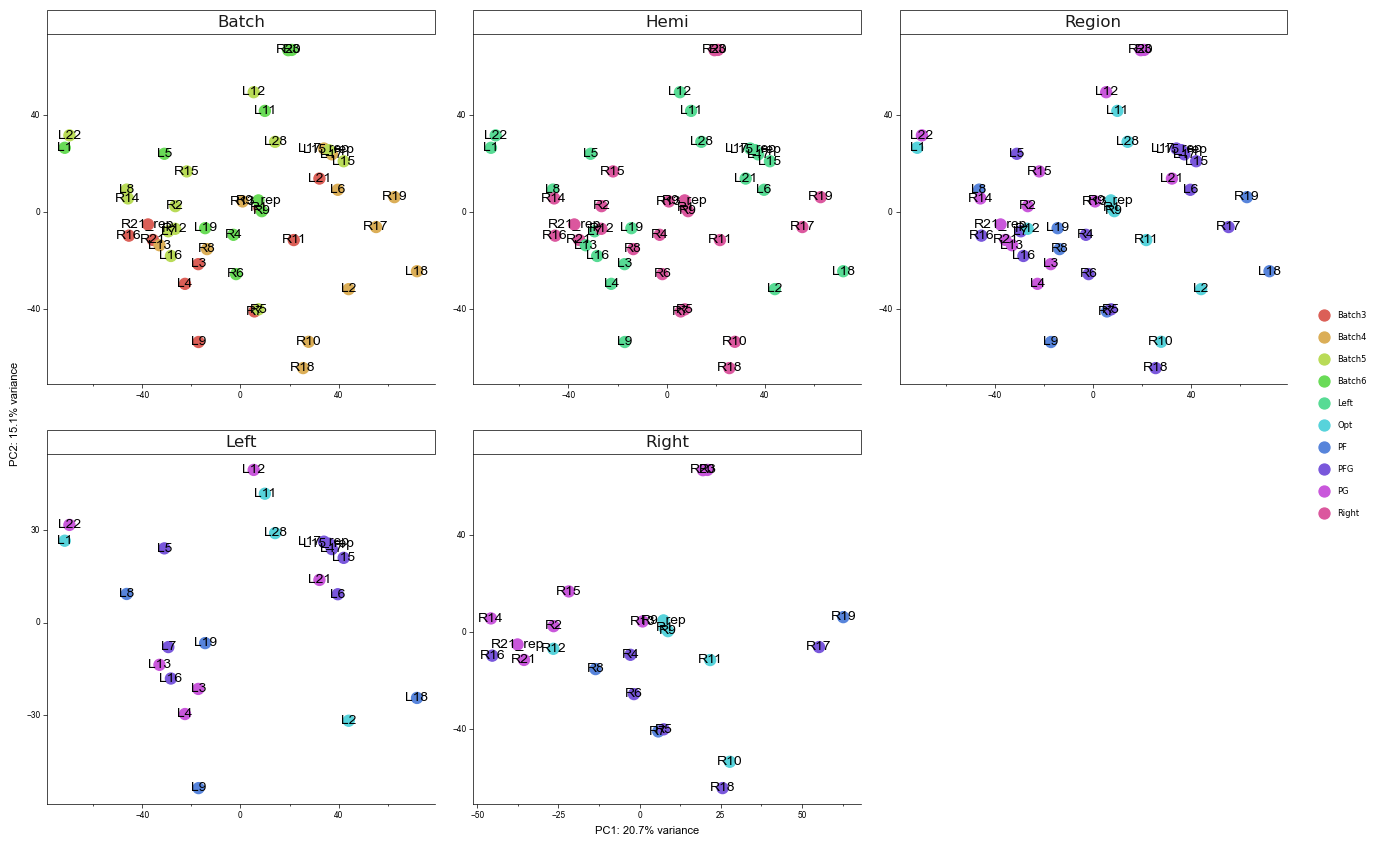

<ggplot: (8748296750731)>

In [48]:
pca_plot = ( p9.ggplot(p9.aes(x="PC1", y="PC2", color="Group"), pca_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="PC1", y="PC2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"PC1: {pca_obj.explained_variance_ratio_[0]:.1%} variance")
    + p9.ylab(f"PC2: {pca_obj.explained_variance_ratio_[1]:.1%} variance")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(pca_plot, "../res/1.qc/PCA_4region.pdf", units="in", width=25, height=16, verbose=False)
pca_plot

In [49]:
## 2.3 tSNE
tsne_obj = TSNE(n_components=2, perplexity=30, init="pca", learning_rate="auto", method='exact',
                metric='correlation', n_iter=10000, early_exaggeration=50)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = tsne_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
tsne_dat = pd.concat(tmp)
tsne_dat["Type"] = pd.Categorical(tsne_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


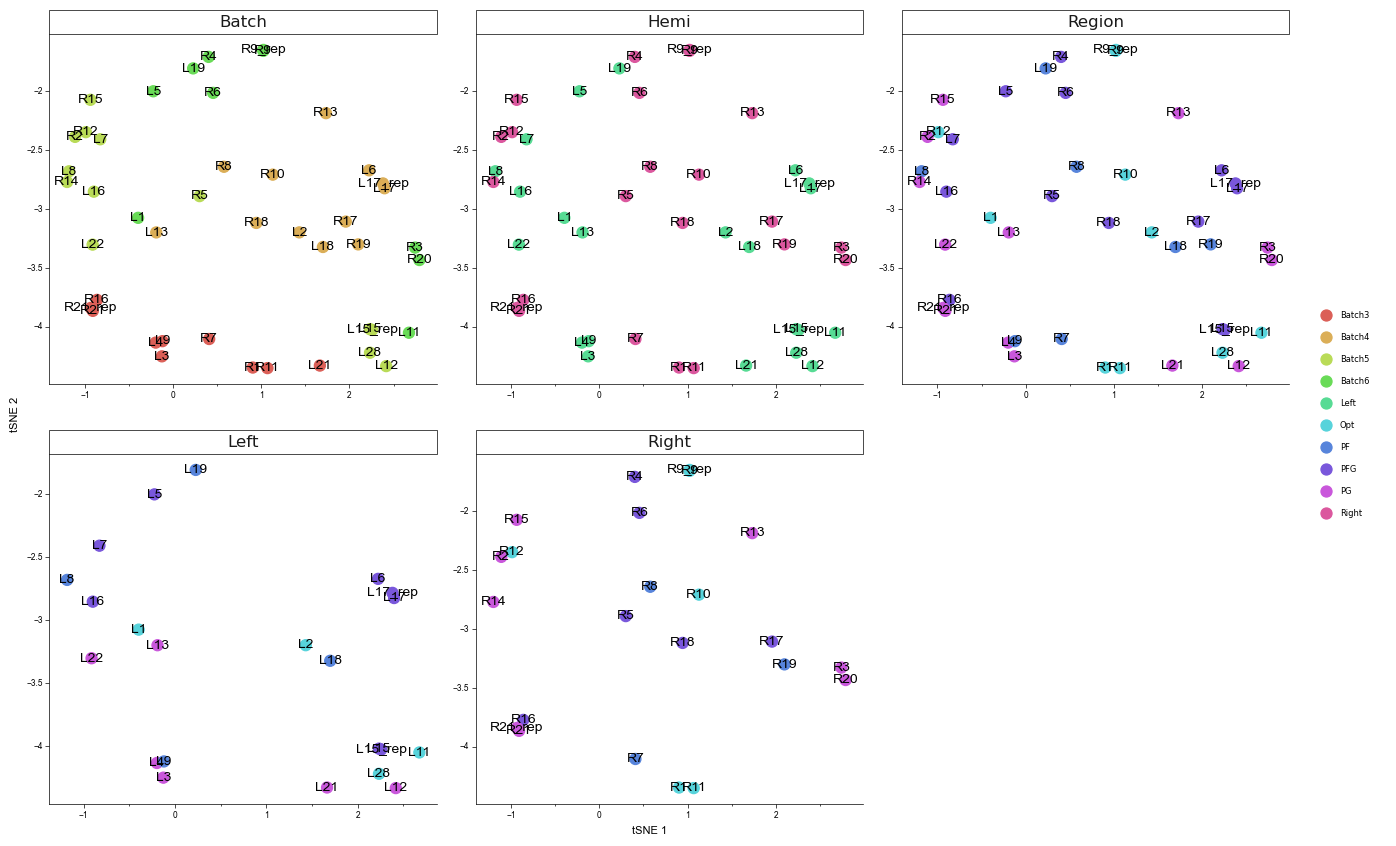

<ggplot: (8748371369030)>

In [50]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="tSNE1", y="tSNE2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_4region.pdf", units="in", width=25, height=16, verbose=False)
tsne_plot

In [51]:
umap_obj = umap.UMAP(n_neighbors=20, n_jobs=4, metric="correlation", learning_rate=0.1,
                     init="random", local_connectivity=5)
umap_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    umap_dat = pd.DataFrame(umap_obj.embedding_, columns=['UMAP1', 'UMAP2'])
    umap_dat["Labels"] = expr.columns
    umap_dat["Group"] = info.loc[umap_dat["Labels"], i].values
    umap_dat["Type"] = i
    tmp.append(umap_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = umap_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
umap_dat = pd.concat(tmp)
umap_dat["Type"] = pd.Categorical(umap_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

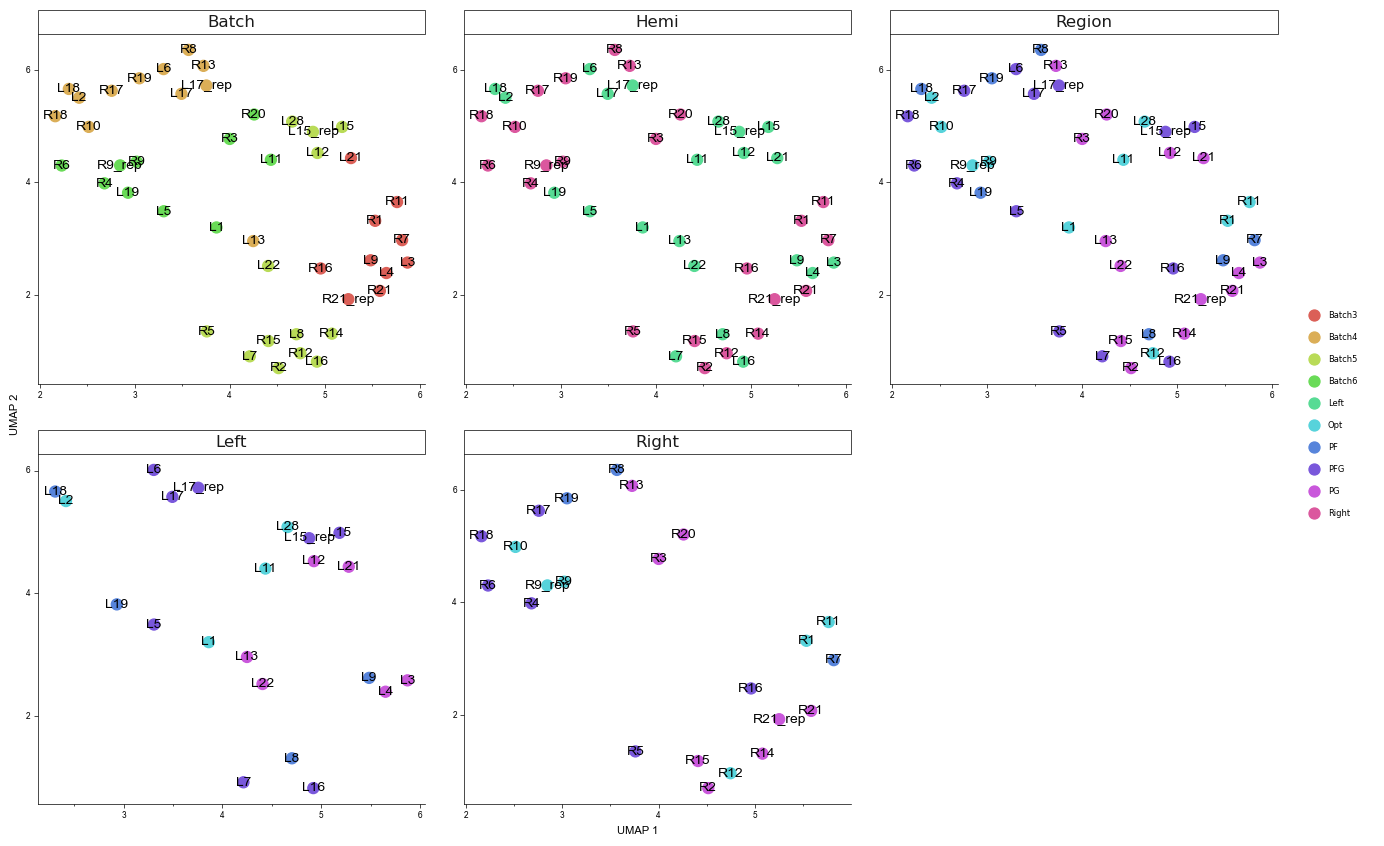

<ggplot: (8748370773812)>

In [52]:
umap_plot = ( p9.ggplot(p9.aes(x="UMAP1", y="UMAP2", color="Group"), umap_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="UMAP1", y="UMAP2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"UMAP 1")
    + p9.ylab(f"UMAP 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/UMAP_4region.pdf", units="in", width=25, height=16, verbose=False)
umap_plot

# 3 使用Lu的注释

In [53]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

region_annot = pd.read_excel("../data/refdata/IPL_lu_cheng group.xlsx", index_col=0)
select_samples = region_annot.index[~region_annot["lu yuheng"].isna()]

expr = expr.loc[:, select_samples]
info = info.loc[select_samples, :]

In [54]:
## 2.3 tSNE
expr_scale = preprocessing.scale(expr.T, axis=0)
tsne_obj = TSNE(n_components=2, perplexity=20, init="pca", learning_rate="auto", method='exact',
                metric='correlation', n_iter=10000, early_exaggeration=50)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = tsne_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
tsne_dat = pd.concat(tmp)
tsne_dat["Type"] = pd.Categorical(tsne_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


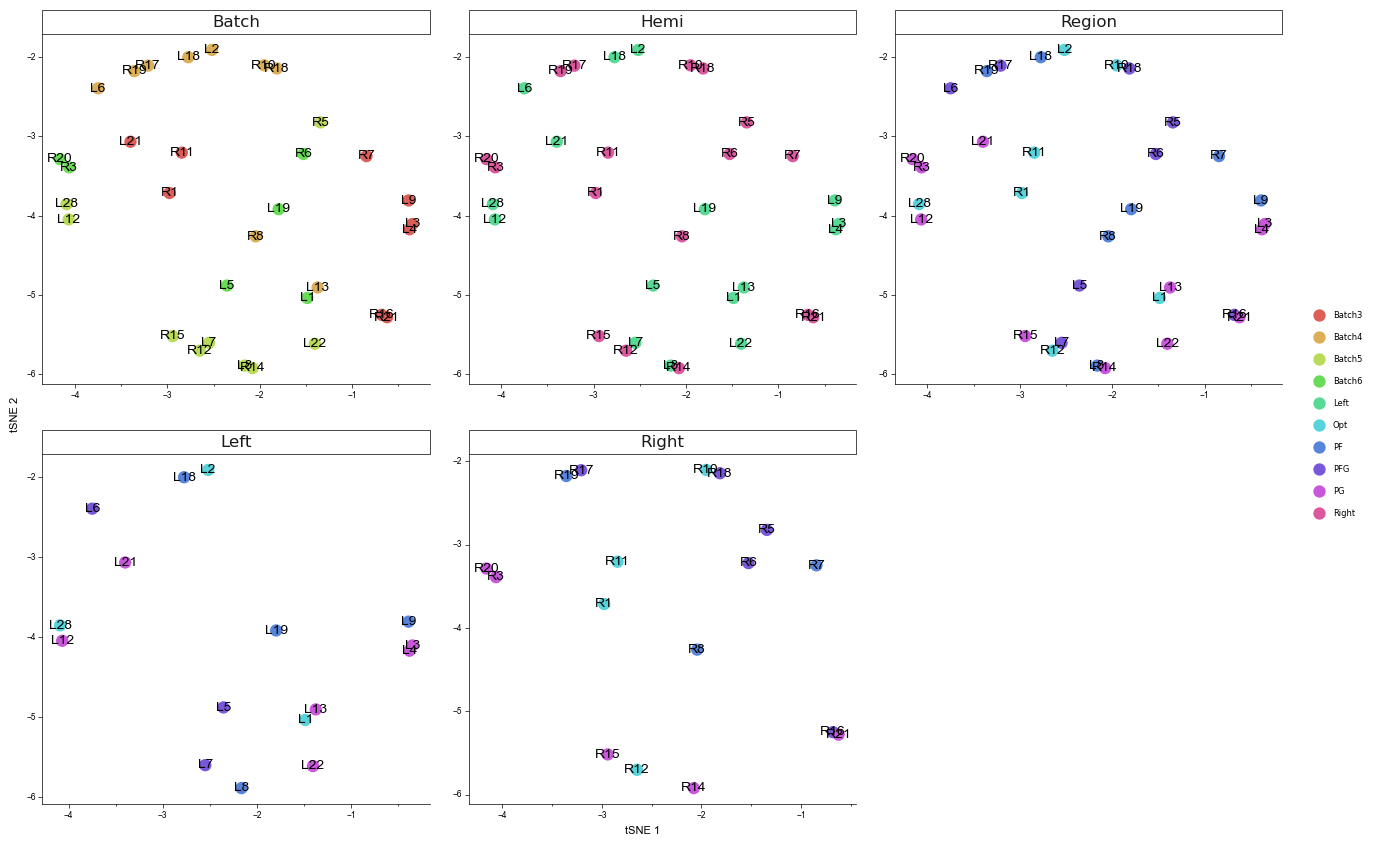

<ggplot: (8748297626073)>

In [55]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="tSNE1", y="tSNE2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_lu_parcel.pdf", units="in", width=25, height=16, verbose=False)
tsne_plot

# 3 使用Cheng的注释

In [56]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

region_annot = pd.read_excel("../data/refdata/IPL_lu_cheng group.xlsx", index_col=0)
select_samples = region_annot.index[~region_annot["Cheng luqi"].isna()]

expr = expr.loc[:, select_samples]
info = info.loc[select_samples, :]
expr.shape

(5542, 27)

In [57]:
## 2.3 tSNE
expr_scale = preprocessing.scale(expr.T, axis=0)
tsne_obj = TSNE(n_components=2, perplexity=20, init="pca", learning_rate="auto", method='exact',
                metric='correlation', n_iter=10000, early_exaggeration=50)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
    if i == "Region":
        left_idx = info.index[info["Hemi"] == "Left"]
        right_idx = info.index[info["Hemi"] == "Right"]
        tmp_use = tsne_dat.copy()
        tmp_use.loc[tmp_use["Labels"].isin(left_idx), "Type"] = "Left"
        tmp_use.loc[tmp_use["Labels"].isin(right_idx), "Type"] = "Right"
        tmp.append(tmp_use.copy())
tsne_dat = pd.concat(tmp)
tsne_dat["Type"] = pd.Categorical(tsne_dat["Type"], categories=["Batch", "Hemi", "Region", "Left", "Right"])

/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


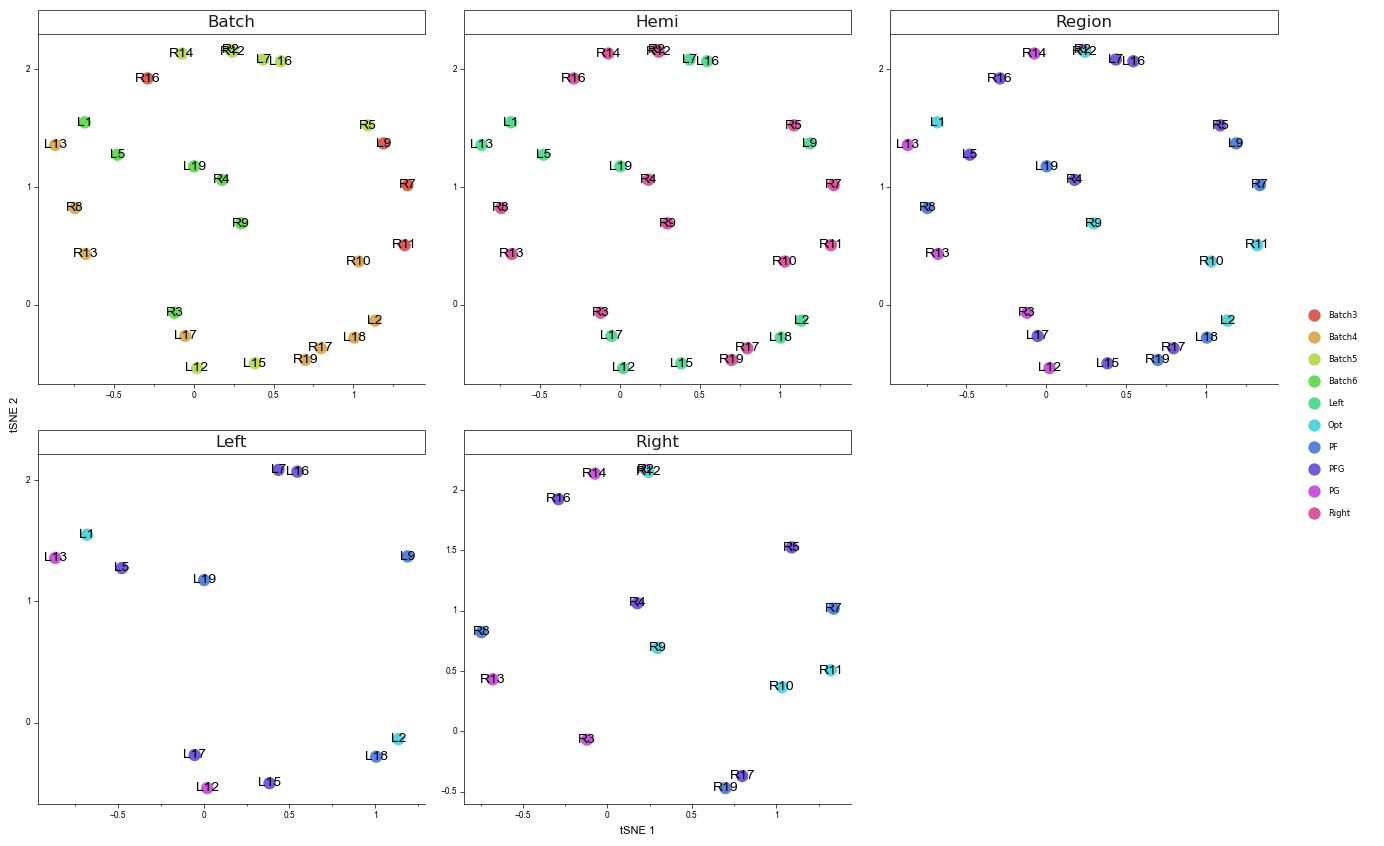

<ggplot: (8748372919827)>

In [58]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=4)
    + p9.geom_text(p9.aes(x="tSNE1", y="tSNE2", label="Labels"), color="black", size=10, family="Arial")
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(16, 10),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1, "hspace":0.2})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=2, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_Cheng_parcel.pdf", units="in", width=25, height=16, verbose=False)
tsne_plot